Train DataFrame (head):
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice

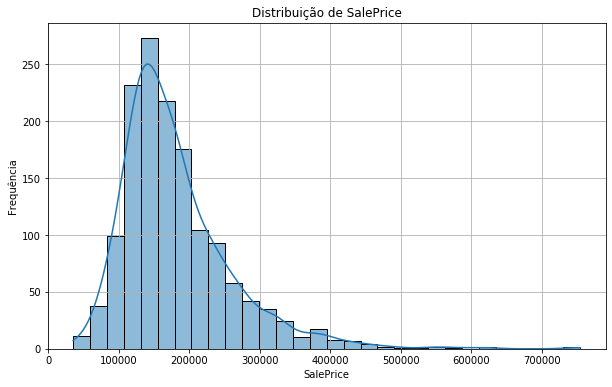


===== Estatísticas Descritivas de SalePrice =====
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

===== Correlação das Variáveis Quantitativas com SalePrice =====
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         

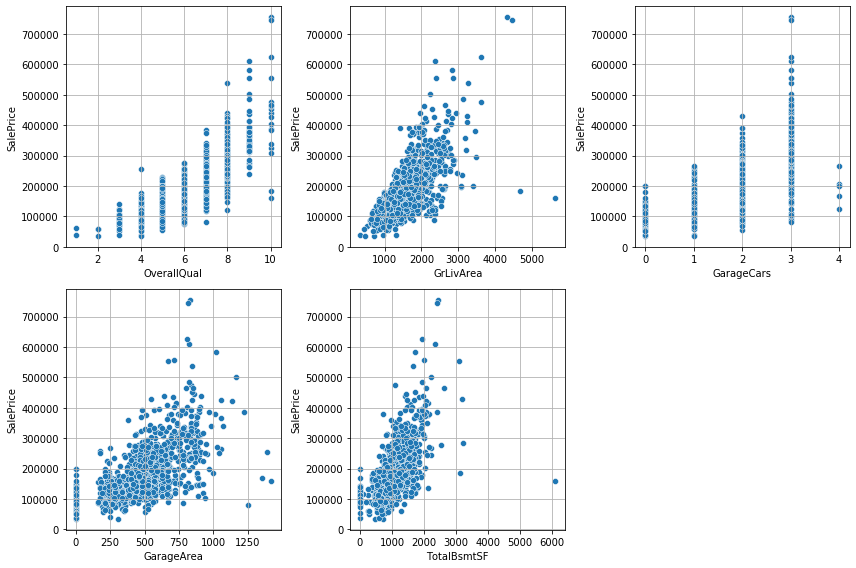

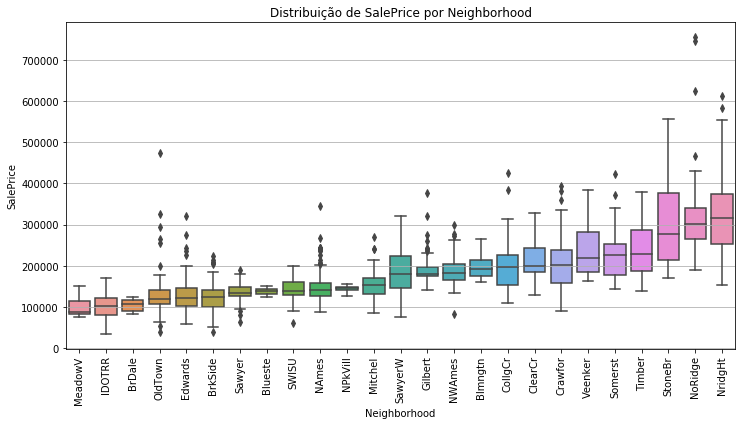

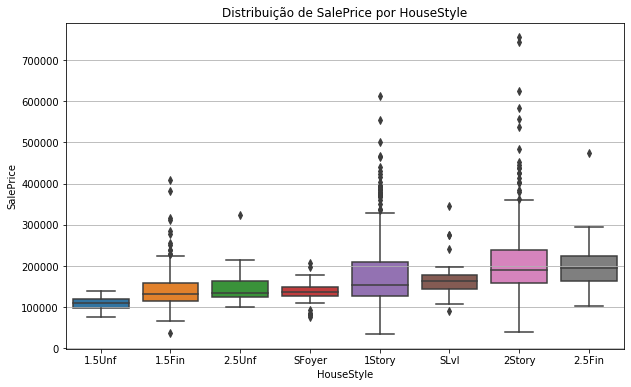


===== Clusterização de Bairros =====
               AvgSalePrice  AvgGrLivArea    AvgLotArea  Cluster
Neighborhood                                                    
Veenker       238772.727273   1539.636364  15606.000000        0
Somerst       225379.837209   1596.651163   7840.872093        0
SawyerW       186555.796610   1595.016949   9923.796610        0
SWISU         142591.360000   1801.240000   8127.560000        0
CollgCr       197965.773333   1480.500000   9619.146667        0
Crawfor       210624.725490   1791.607843  11809.686275        0
Gilbert       192854.506329   1641.316456  11379.151899        0
NWAmes        189050.068493   1727.780822  11833.630137        0
Sawyer        136793.135135   1215.135135  10459.283784        1
OldTown       128225.300885   1479.725664   8207.061947        1
NPkVill       142694.444444   1253.000000   3267.444444        1
Blmngtn       194870.882353   1427.941176   3398.176471        1
MeadowV        98576.470588   1058.941176   2324.000

"\nA coluna 'SalePrice' em 'submission' é a previsão final para o conjunto de teste.\nEsta é a saída que, em um cenário de competição (ex.: Kaggle), seria enviada para avaliação.\n"

In [7]:
# -*- coding: utf-8 -*-
"""
Notebook de Análise Exploratória e Modelagem
--------------------------------------------------

Objetivo:
 1. Carregar e inspecionar os dados de treino e teste.
 2. Definir e classificar variáveis qualitativas, binárias, quantitativas contínuas e discretas.
 3. Analisar a influência das variáveis no preço de venda (SalePrice), incluindo:
    - Análise de distribuição e correlação para variáveis numéricas.
    - Boxplots e agrupamentos para variáveis categóricas.
    - Clusterização (incluindo agrupamento por localização/bairro).
 4. Sugerir caminhos de modelagem com Machine Learning, sob perspectiva de BI.
 5. Implementar um modelo de previsão (ex.: Regressão Linear) usando o conjunto de treino e prevendo no conjunto de teste.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')

# Configurações gerais de exibição
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams['axes.grid'] = True

#####################################
# 1. Carregamento e Inspeção de Dados
#####################################

# Definir caminhos dos arquivos (ajuste conforme necessário)
train_path = "data/train.csv"
test_path = "data/test.csv"

# Carregar os arquivos CSV
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Exibir as primeiras linhas de cada DataFrame para verificação
print("Train DataFrame (head):")
print(train_df.head())
print("\nTest DataFrame (head):")
print(test_df.head())

# Verificando dimensões
print("\nDimensões do Train:", train_df.shape)
print("Dimensões do Test:", test_df.shape)

#####################################
# 2. Definição e Classificação das Variáveis
#####################################

# Variável alvo no train_df
target_variable = "SalePrice"

# Variáveis Qualitativas
qualitative = [
    "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood", 
    "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", 
    "MasVnrType", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", 
    "HeatingQC", "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", 
    "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature", "SaleType", "SaleCondition"
]

# Variável Binária
binary = ["CentralAir"]

# Variáveis Quantitativas (Contínuas)
quantitative_continuous = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", 
    "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
    "ScreenPorch", "PoolArea"
]

# Variáveis Quantitativas (Discretas)
quantitative_discrete = [
    "MSSubClass", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "BsmtFullBath", "BsmtHalfBath", "FullBath", 
    "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageYrBlt", "MiscVal", 
    "MoSold", "YrSold"
]

# Identificação das categorias para variáveis qualitativas (no train_df)
qualitative_categories = {
    var: train_df[var].dropna().unique().tolist() 
    for var in qualitative
}

print("\n===== Categorias Identificadas para Variáveis Qualitativas =====")
for var, categories in qualitative_categories.items():
    print(f"{var}: {categories}")

#####################################
# 3. Análise Exploratória
#####################################

# 3.1 Distribuição da Variável Alvo
plt.figure(figsize=(10,6))
sns.histplot(train_df[target_variable], bins=30, kde=True)
plt.title("Distribuição de SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequência")
plt.show()

# 3.2 Estatísticas Descritivas
print("\n===== Estatísticas Descritivas de SalePrice =====")
print(train_df[target_variable].describe())

# 3.3 Correlação entre Variáveis Quantitativas e SalePrice
print("\n===== Correlação das Variáveis Quantitativas com SalePrice =====")
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
correlation = train_df[numeric_cols].corr()[target_variable].sort_values(ascending=False)
print(correlation)

# Visualizar as 5 variáveis numéricas mais correlacionadas com SalePrice
top_corr_features = correlation.index[1:6]

plt.figure(figsize=(12, 8))
for i, feature in enumerate(top_corr_features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=train_df[feature], y=train_df[target_variable])
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
plt.tight_layout()
plt.show()

#####################################
# 4. Análise da Influência das Variáveis Qualitativas
#####################################

# Exemplo: Comparação de SalePrice por Bairro (Neighborhood)
plt.figure(figsize=(12,6))
order = train_df.groupby("Neighborhood")[target_variable].median().sort_values().index
sns.boxplot(x="Neighborhood", y=target_variable, data=train_df, order=order)
plt.xticks(rotation=90)
plt.title("Distribuição de SalePrice por Neighborhood")
plt.show()

# Exemplo: Comparação de SalePrice por Estilo de Habitação (HouseStyle)
plt.figure(figsize=(10,6))
order = train_df.groupby("HouseStyle")[target_variable].median().sort_values().index
sns.boxplot(x="HouseStyle", y=target_variable, data=train_df, order=order)
plt.title("Distribuição de SalePrice por HouseStyle")
plt.show()

#####################################
# 5. Clusterização (Exemplo)
#####################################

"""
Exemplo de clusterização considerando:
 - Variáveis contínuas
 - Possível clusterização geográfica usando a variável Neighborhood

A base não contém latitude/longitude. Para uma clusterização geográfica aproximada,
podemos usar 'Neighborhood' como proxy de localização. Veremos como agrupar bairros
com base em estatísticas de preço.
"""

neigh_stats = train_df.groupby("Neighborhood").agg({
    "SalePrice": "mean",
    "GrLivArea": "mean",
    "LotArea": "mean"
})

# Renomear colunas
neigh_stats.columns = ["AvgSalePrice", "AvgGrLivArea", "AvgLotArea"]

# Normalizar dados para KMeans
scaler = StandardScaler()
neigh_scaled = scaler.fit_transform(neigh_stats)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(neigh_scaled)
neigh_stats["Cluster"] = clusters

print("\n===== Clusterização de Bairros =====")
print(neigh_stats.sort_values("Cluster"))

# Visualizar clusters: médias de cada cluster
cluster_groups = neigh_stats.groupby("Cluster").mean()[["AvgSalePrice", "AvgGrLivArea", "AvgLotArea"]]
print("\nMédias por Cluster:")
print(cluster_groups)

#####################################
# 6. Sugestões de Abordagem para Modelagem e Implementação do Modelo
#####################################

"""
Considerações de um analista de BI/Dados:
- Tratar valores ausentes (missing data) antes de modelar.
- Converter variáveis categóricas (qualitativas) em numéricas: one-hot encoding ou ordinal (onde fizer sentido).
- Normalizar ou padronizar variáveis quantitativas para métodos sensíveis à escala (ex.: regressão linear, redes neurais).
- Testar diferentes algoritmos de ML:
  - Regressão Linear (simples ou regularizada, ex.: Lasso/Ridge)
  - Árvore de Decisão / Random Forest
  - XGBoost / LightGBM
- Avaliar desempenho usando métricas adequadas:
  - RMSE (Root Mean Squared Error)
  - MAE (Mean Absolute Error)
  - R² (coeficiente de determinação)
- Realizar feature engineering (ex.: criar variáveis derivadas, remover outliers) 
  e ajustar hiperparâmetros para obter melhores resultados.

Objetivo: Prever 'SalePrice' no conjunto de teste, submetendo a previsão no formato adequado (ex.: Kaggle).
"""

print("\n===== Sugestões de Abordagem para Modelagem =====")
print("1. Tratar valores ausentes e transformar variáveis categóricas em numéricas.")
print("2. Normalizar ou padronizar variáveis quantitativas para modelos sensíveis a escalas.")
print("3. Considerar 'Neighborhood' e possíveis variáveis agrupadas (clusters) como features.")
print("4. Testar modelos como Regressão Linear, Random Forest e XGBoost.")
print("5. Avaliar desempenho com métricas como RMSE e R².")

#####################################
# 7. Modelagem (Exemplo Simplificado)
#####################################

# 7.1 Exemplo de Tratamento Simplificado
# ======================================
#  - Selecionar algumas features baseadas na correlação
#  - Tratar missing values de forma simples
#  - Converter a variável binária "CentralAir" para 0/1
#  - Não faremos encode das demais categóricas aqui, mas é altamente recomendado em um projeto real

# Selecionar as top 10 features numéricas mais correlacionadas, ignorando SalePrice (posição 0)
num_features = correlation.index[1:11].tolist()
# Poderíamos incluir algumas variáveis qualitativas codificadas, mas para demonstração manteremos assim

# Incluindo a coluna binária
feature_cols = num_features + binary

# Copiar apenas essas colunas + alvo
model_data = train_df[feature_cols + [target_variable]].copy()

# Converter CentralAir em 0/1
model_data["CentralAir"] = model_data["CentralAir"].map({"Y": 1, "N": 0})

# Tratar Missing Values (simples)
model_data.fillna(0, inplace=True)

# Definir X, y
X = model_data[feature_cols]
y = model_data[target_variable]

# Dividir em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 7.2 Treinar um modelo de Regressão Linear (Exemplo)
# ====================================================
model = LinearRegression()
model.fit(X_train, y_train)

# 7.3 Avaliação no Conjunto de Validação
# =======================================
y_pred = model.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print("\n===== Avaliação do Modelo - Conjunto de Validação =====")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# 7.4 Prever no Conjunto de Teste
# ===============================
# Precisamos aplicar o mesmo tratamento no test_df
test_data = test_df[feature_cols].copy()

# Converter CentralAir para 0/1
test_data["CentralAir"] = test_data["CentralAir"].map({"Y": 1, "N": 0})

# Tratar Missing Values (simples)
test_data.fillna(0, inplace=True)

# Previsão final
predictions = model.predict(test_data)

# Criar dataframe de submissão com Id e SalePrice
submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": predictions
})

print("\n===== Submissão (amostra) =====")
print(submission.head())

"""
A coluna 'SalePrice' em 'submission' é a previsão final para o conjunto de teste.
Esta é a saída que, em um cenário de competição (ex.: Kaggle), seria enviada para avaliação.
"""
